<a href="https://colab.research.google.com/github/ashok414147/Stock_Market_Prediction_using_Python/blob/main/Final_CSE422_Project_Group_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group members:

1. Ashok Lamichhane (21201785)

2. Mukund Prasad Singh (20201202)

3. Udoy Saha (23341134)

4. Noor E Jannat Nafia (21301631)

**We will predict whether it will be beneficial to purchase a stock of a company on a particular day.** <br>
(A stock purchase is only benificial when the closing price of the day is higher than the opening price of a day.)<br><br>


Dataset source - Kaggle<br>
Link - https://www.kaggle.com/datasets/khushipitroda/stock-market-historical-data-of-top-10-companies<br>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# all libraries as needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# **Reading dataset and inserting into our dataframe**


In [ ]:
#dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CSE422/data.csv")
dataframe = pd.read_csv("/content/drive/My Drive/CSE422 Lab/CSE422 Project Group 1/data.csv")
dataframe.head()

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,7/17/2023,$193.99,50520160.0,$191.90,$194.32,$191.81
1,AAPL,7/14/2023,$190.69,41616240.0,$190.23,$191.18,$189.63
2,AAPL,7/13/2023,$190.54,41342340.0,$190.50,$191.19,$189.78
3,AAPL,7/12/2023,$189.77,60750250.0,$189.68,$191.70,$188.47
4,AAPL,7/11/2023,$188.08,46638120.0,$189.16,$189.30,$186.60


In [ ]:
# Finding out the number of companies present
companies = dataframe['Company'].unique()
print("All companies:")
for company in companies:
  print(company)

All companies:
AAPL
SBUX
MSFT
CSCO
QCOM
META
AMZN
TSLA
AMD
NFLX


In [ ]:
# As we will predict the opening and closing price for a specific company, choose a company
predicting_company = input("Enter the company name to predict from the list above : ").upper()
print("Company to predict : " + predicting_company)

Enter the company name to predict from the list above : AAPL
Company to predict : AAPL


In [ ]:
# Selecting records for the chosen company
dataframe = dataframe[dataframe['Company'] == predicting_company]
dataframe

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,7/17/2023,$193.99,50520160.0,$191.90,$194.32,$191.81
1,AAPL,7/14/2023,$190.69,41616240.0,$190.23,$191.18,$189.63
2,AAPL,7/13/2023,$190.54,41342340.0,$190.50,$191.19,$189.78
3,AAPL,7/12/2023,$189.77,60750250.0,$189.68,$191.70,$188.47
4,AAPL,7/11/2023,$188.08,46638120.0,$189.16,$189.30,$186.60
...,...,...,...,...,...,...,...
2511,AAPL,7/24/2013,$15.73,591624923.0,$15.68,$15.88,$15.55
2512,AAPL,7/23/2013,$14.96,354477618.0,$15.21,$15.25,$14.95
2513,AAPL,7/22/2013,$15.23,207648981.0,$15.34,$15.35,$15.20
2514,AAPL,7/19/2013,$15.18,268548901.0,$15.47,$15.50,$15.16


In [ ]:
# Information about the columns
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2515
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Company     2516 non-null   object 
 1   Date        2516 non-null   object 
 2   Close/Last  2509 non-null   object 
 3   Volume      2513 non-null   float64
 4   Open        2510 non-null   object 
 5   High        2510 non-null   object 
 6   Low         2511 non-null   object 
dtypes: float64(1), object(6)
memory usage: 157.2+ KB


There is some issues in this dataset. They are: <br>
* The values of Date column needs to be formatted to Pandas 'datetime' format
* Columns Close/Last, Open, High and Low needs to be converted into numerical type
* Some Null values need to be Imputed from columns:
  *   Close/Last
  *   Volume
  *   Open
  *   High
  *   Low

In [ ]:
# Converting Date column into Timestamp format
dataframe['Date'] = pd.to_datetime(dataframe['Date'])
dataframe.head()

<ipython-input-11-6ea391dd7125>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Date'] = pd.to_datetime(dataframe['Date'])


,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,2023-07-17,$193.99,50520160.0,$191.90,$194.32,$191.81
1,AAPL,2023-07-14,$190.69,41616240.0,$190.23,$191.18,$189.63
2,AAPL,2023-07-13,$190.54,41342340.0,$190.50,$191.19,$189.78
3,AAPL,2023-07-12,$189.77,60750250.0,$189.68,$191.70,$188.47
4,AAPL,2023-07-11,$188.08,46638120.0,$189.16,$189.30,$186.60


In [ ]:
# Timestamp format is not appropriate for training. So, it is converted into the count of day from the initial day.
initial_day = dataframe['Date'].min()
# Total = (dataframe.Date.max() - initial_day).days

In [ ]:
# Converting columns Date, Close/Last, Open, High and Low to appropriate type
dataframe["Date"] = dataframe["Date"].apply(lambda row: (row-initial_day).days)
dataframe["Close/Last"] = dataframe["Close/Last"].apply(lambda row: float(row[1:]) if type(row) == str else row)
dataframe["Open"] = dataframe["Open"].apply(lambda row: float(row[1:]) if type(row) == str else row)
dataframe["High"] = dataframe["High"].apply(lambda row: float(row[1:]) if type(row) == str else row)
dataframe["Low"] = dataframe["Low"].apply(lambda row: float(row[1:]) if type(row) == str else row)
dataframe.head()

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,3651,193.99,50520160.0,191.90,194.32,191.81
1,AAPL,3648,190.69,41616240.0,190.23,191.18,189.63
2,AAPL,3647,190.54,41342340.0,190.50,191.19,189.78
3,AAPL,3646,189.77,60750250.0,189.68,191.70,188.47
4,AAPL,3645,188.08,46638120.0,189.16,189.30,186.60


In [ ]:
# Data imputation
impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(dataframe[['Close/Last', 'Volume', 'Open', 'High', 'Low']])

dataframe[['Close/Last', 'Volume', 'Open', 'High', 'Low']] = impute.transform(dataframe[['Close/Last', 'Volume', 'Open', 'High', 'Low']])

In [ ]:
dataframe.head()

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,3651,193.99,50520160.0,191.90,194.32,191.81
1,AAPL,3648,190.69,41616240.0,190.23,191.18,189.63
2,AAPL,3647,190.54,41342340.0,190.50,191.19,189.78
3,AAPL,3646,189.77,60750250.0,189.68,191.70,188.47
4,AAPL,3645,188.08,46638120.0,189.16,189.30,186.60


**By now, the dataframe does not have any null values.<br>
The datatypes are also adjusted.**

# Exploratory Data Analysis

In [ ]:
# Information about the columns
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2515
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Company     2516 non-null   object 
 1   Date        2516 non-null   int64  
 2   Close/Last  2516 non-null   float64
 3   Volume      2516 non-null   float64
 4   Open        2516 non-null   float64
 5   High        2516 non-null   float64
 6   Low         2516 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 157.2+ KB


In [ ]:
# Description of the column values
dataframe.describe()

,Date,Close/Last,Volume,Open,High,Low
count,2516.000000,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000
mean,1823.674881,70.197326,1.495310e+08,70.171299,70.884757,69.418451
std,1053.962451,52.363342,9.670543e+07,52.331899,52.942673,51.719906
min,0.000000,14.960000,3.134660e+07,15.210000,15.250000,14.950000
25%,910.750000,28.385000,8.625942e+07,28.377500,28.620000,28.090000
50%,1824.500000,44.205000,1.204674e+08,44.075000,44.530000,43.770000
75%,2736.250000,124.452500,1.828922e+08,124.295000,125.432500,122.775000
max,3651.000000,193.990000,1.065209e+09,193.780000,194.480000,191.810000


<ipython-input-18-fff730b99f2c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataframe.corr(), cmap = 'YlGnBu')


<Axes: >

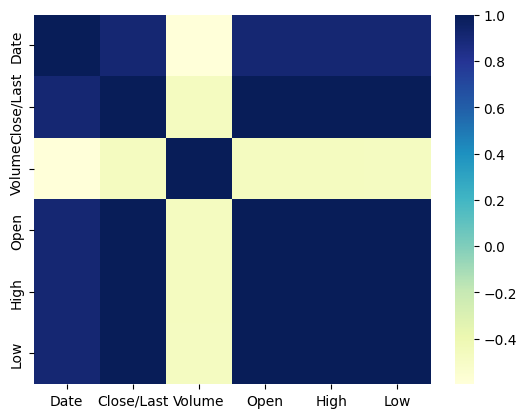

In [ ]:
# Correlation heatmap
sns.heatmap(dataframe.corr(), cmap = 'YlGnBu')

# The Opening and Closing price will be predicted. High ad Low price is highly correlated with those. Since those columns add no extra information, those are dropped.

In [ ]:
dataframe = dataframe.drop('High', axis=1)
dataframe = dataframe.drop('Low', axis=1)
dataframe

,Company,Date,Close/Last,Volume,Open
0,AAPL,3651,193.99,50520160.0,191.90
1,AAPL,3648,190.69,41616240.0,190.23
2,AAPL,3647,190.54,41342340.0,190.50
3,AAPL,3646,189.77,60750250.0,189.68
4,AAPL,3645,188.08,46638120.0,189.16
...,...,...,...,...,...
2511,AAPL,6,15.73,591624923.0,15.68
2512,AAPL,5,14.96,354477618.0,15.21
2513,AAPL,4,15.23,207648981.0,15.34
2514,AAPL,1,15.18,268548901.0,15.47


Text(0, 0.5, 'Open and Close/Last Price')

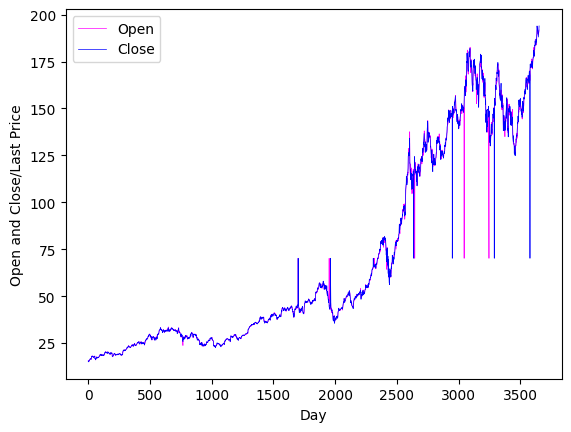

In [ ]:
# Visualizing the Data
sns.lineplot(x = "Date", y = "Open", data = dataframe, color = "magenta", label = 'Open', linewidth = 0.5)
sns.lineplot(x = "Date", y = "Close/Last", data = dataframe, color = "blue", label = 'Close', linewidth = 0.5)
plt.xlabel('Day')
plt.ylabel('Open and Close/Last Price')

# All features and the output variables are separated at this point


In [ ]:
X = dataframe[['Date', 'Volume']]
# X = dataframe[['Date']]
X

,Date,Volume
0,3651,50520160.0
1,3648,41616240.0
2,3647,41342340.0
3,3646,60750250.0
4,3645,46638120.0
...,...,...
2511,6,591624923.0
2512,5,354477618.0
2513,4,207648981.0
2514,1,268548901.0


In [ ]:
Y_Open = dataframe['Open']
Y_Open

0       191.90
1       190.23
2       190.50
3       189.68
4       189.16
         ...  
2511     15.68
2512     15.21
2513     15.34
2514     15.47
2515     15.48
Name: Open, Length: 2516, dtype: float64

In [ ]:
Y_Close = dataframe['Close/Last']
Y_Close

0       193.99
1       190.69
2       190.54
3       189.77
4       188.08
         ...  
2511     15.73
2512     14.96
2513     15.23
2514     15.18
2515     15.42
Name: Close/Last, Length: 2516, dtype: float64

# Train Test Split section

In [ ]:
xTrain, xTest, yOpenTrain, yOpenTest = train_test_split(X, Y_Open, test_size = .3, random_state = 1)
xTrain, xTest, yCloseTrain, yCloseTest = train_test_split(X, Y_Close, test_size = .3, random_state = 1)

In [ ]:
xTrain

,Date,Volume
820,2461,131022920.0
2217,432,253023440.0
1272,1803,126529280.0
2337,258,179215104.0
2004,741,147648160.0
...,...,...
960,2255,231908360.0
905,2335,128730600.0
1096,2059,95943840.0
235,3308,60362340.0


In [ ]:
xTest

,Date,Volume
1077,2086,76360200.0
1957,809,208132400.0
228,3317,79542040.0
1972,788,233118280.0
2325,277,182185847.0
...,...,...
1475,1506,66257360.0
1355,1684,149414680.0
2319,285,336197546.0
1832,992,106241680.0


In [ ]:
yOpenTrain

820      67.08
2217     25.15
1272     45.85
2337     19.37
2004     30.79
         ...  
960      55.35
905      67.50
1096     42.58
235     166.37
1061     51.10
Name: Open, Length: 1761, dtype: float64

In [ ]:
yOpenTest

1077     48.70
1957     27.47
228     172.77
1972     29.15
2325     18.76
         ...  
1475     41.20
1355     44.09
2319     21.21
1832     27.38
1293     47.19
Name: Open, Length: 755, dtype: float64

In [ ]:
yCloseTrain

820      68.31
2217     25.66
1272     45.54
2337     19.38
2004     30.75
         ...  
960      54.43
905      66.73
1096     43.23
235     164.87
1061     51.15
Name: Close/Last, Length: 1761, dtype: float64

In [ ]:
yCloseTest

1077     48.92
1957     27.70
228     174.55
1972     28.83
2325     18.97
         ...  
1475     41.01
1355     44.74
2319     21.15
1832     27.45
1293     47.04
Name: Close/Last, Length: 755, dtype: float64

# In this step, feature scaling is performed

In [ ]:
# This is for MinMaxScaler scaling technique
scaler1 = MinMaxScaler()
scaler1.fit(xTrain)

xTrain_scaled1 = scaler1.transform(xTrain)
xTest_scaled1 = scaler1.transform(xTest)

# Fit with xTrain_scaled1 & yOpenTrain/yCloseTrain
# Predict with xTest_scaled1
# Score with xTest_scaled1 & yOpenTest/yCloseTest

In [ ]:
xTrain_scaled1

array([[0.6740619 , 0.09641155],
       [0.11832375, 0.2144161 ],
       [0.4938373 , 0.09206509],
       ...,
       [0.56395508, 0.06248144],
       [0.90605314, 0.02806537],
       [0.57819775, 0.05483787]])

In [ ]:
xTest_scaled1

array([[0.57135031, 0.04353924],
       [0.22158313, 0.17099541],
       [0.90851821, 0.04661686],
       ...,
       [0.07806081, 0.29486594],
       [0.27170638, 0.07244199],
       [0.48507258, 0.05916742]])

In [ ]:
# This is for StandardScaler scaling technique
scaler2 = StandardScaler()
scaler2.fit(xTrain)

xTrain_scaled2 = scaler2.transform(xTrain)
xTest_scaled2 = scaler2.transform(xTest)

# Fit with xTrain_scaled2 & yOpenTrain/yCloseTrain
# Predict with xTest_scaled2
# Score with xTest_scaled2 & yOpenTest/yCloseTest

In [ ]:
xTrain_scaled2

array([[ 0.59399487, -0.19758749],
       [-1.31565138,  1.04213284],
       [-0.02529898, -0.24325006],
       ...,
       [ 0.21564209, -0.55404703],
       [ 1.39117101, -0.91561196],
       [ 0.26458325, -0.63434805]])

In [ ]:
xTest_scaled2

array([[ 0.24105385, -0.75304812],
       [-0.960828  ,  0.58596811],
       [ 1.3996416 , -0.72071554],
       ...,
       [-1.45400427,  1.88731474],
       [-0.78859278, -0.44940451],
       [-0.05541662, -0.5888631 ]])

# Fitting into models
**Now different models can be fitted using processed data**

In [ ]:
# Finally, a function to test the score of predicting Profit

def profit_score(yClosePrediction, yOpenPrediction):
  predicted = yClosePrediction - yOpenPrediction
  actual = (yCloseTest - yOpenTest).to_numpy()

  for i in range(len(predicted)):
    if predicted[i] > 0:
      predicted[i] = True
    else:
      predicted[i] = False

  for i in range(len(actual)):
    if actual[i] > 0:
      actual[i] = True
    else:
      actual[i] = False

  matched_predictions = 0

  for i in range(len(predicted)):
    if predicted[i] == actual[i]:
      matched_predictions += 1

  print(matched_predictions*100/len(predicted), "%")



# *   Linear regression




In [ ]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()

In [ ]:
# Firstly using scaler1

# For Open price
linReg.fit(xTrain_scaled1, yOpenTrain)

yOpenPrediction1 = linReg.predict(xTest_scaled1)

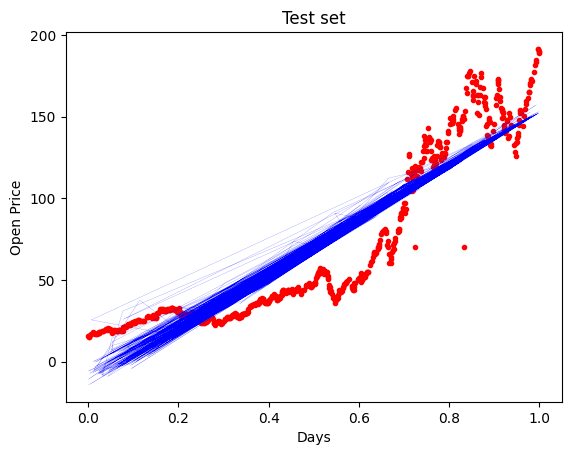

In [ ]:
plt.scatter(xTest_scaled1[:, 0], yOpenTest, color = 'red', marker = '.')
plt.plot(xTest_scaled1[:, 0], linReg.predict(xTest_scaled1), color = 'blue', linewidth = 0.1)
plt.title('Test set')
plt.xlabel('Days')
plt.ylabel('Open Price')
plt.show()

In [ ]:
print(linReg.score(xTest_scaled1, yOpenTest)*100, "%")

83.54120928164954 %


In [ ]:
# For Close price
linReg.fit(xTrain_scaled1, yCloseTrain)

yClosePrediction1 = linReg.predict(xTest_scaled1)

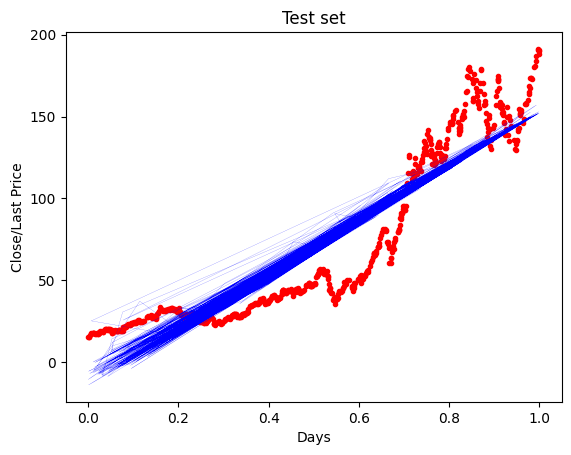

In [ ]:
plt.scatter(xTest_scaled1[:, 0], yCloseTest, color = 'red', marker = '.')
plt.plot(xTest_scaled1[:, 0], linReg.predict(xTest_scaled1), color = 'blue', linewidth = 0.1)
plt.title('Test set')
plt.xlabel('Days')
plt.ylabel('Close/Last Price')
plt.show()

In [ ]:
print(linReg.score(xTest_scaled1, yCloseTest)*100, "%")

83.82782481659446 %


In [ ]:
profit_score(yClosePrediction1, yOpenPrediction1)

50.33112582781457 %


In [ ]:
# Secondly using scaler2

# For Open price
linReg.fit(xTrain_scaled2, yOpenTrain)

yOpenPrediction2 = linReg.predict(xTest_scaled2)

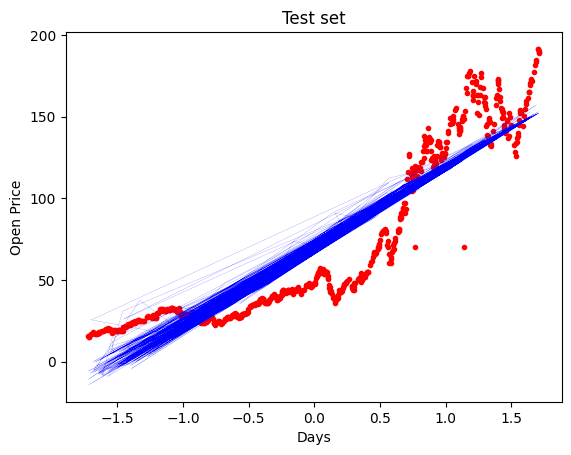

In [ ]:
plt.scatter(xTest_scaled2[:, 0], yOpenTest, color = 'red', marker = '.')
plt.plot(xTest_scaled2[:, 0], linReg.predict(xTest_scaled2), color = 'blue', linewidth = 0.1)
plt.title('Test set')
plt.xlabel('Days')
plt.ylabel('Open Price')
plt.show()

In [ ]:
print(linReg.score(xTest_scaled2, yOpenTest)*100, "%")

83.54120928164954 %


In [ ]:
# For Close price
linReg.fit(xTrain_scaled2, yCloseTrain)

yClosePrediction2 = linReg.predict(xTest_scaled2)

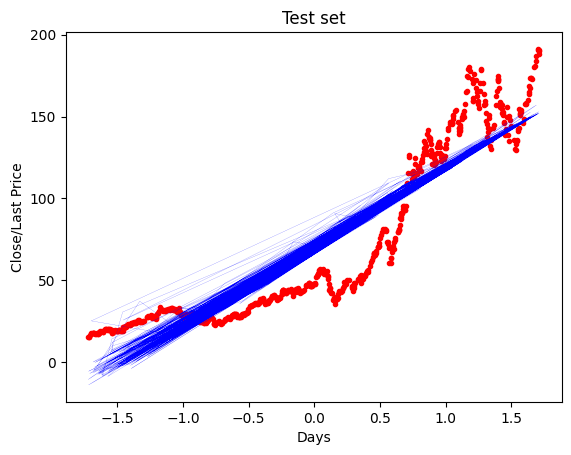

In [ ]:
plt.scatter(xTest_scaled2[:, 0], yCloseTest, color = 'red', marker = '.')
plt.plot(xTest_scaled2[:, 0], linReg.predict(xTest_scaled2), color = 'blue', linewidth = 0.1)
plt.title('Test set')
plt.xlabel('Days')
plt.ylabel('Close/Last Price')
plt.show()

In [ ]:
print(linReg.score(xTest_scaled2, yCloseTest)*100, "%")

83.82782481659447 %


In [ ]:
profit_score(yClosePrediction2, yOpenPrediction2)

50.33112582781457 %


# **Support Vector machine**
For Scale 1


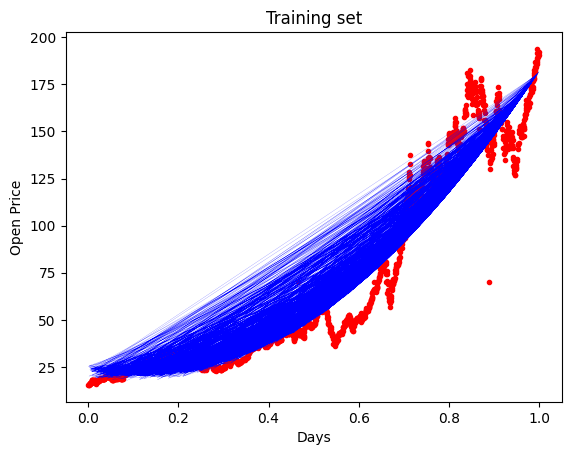

In [ ]:
#For Open Price
from sklearn.svm import SVR

# Create support vector regression model and fit the data to it
model = SVR(kernel='rbf', C=1e3, gamma=0.1) # Radial basis function kernel
model.fit(xTrain_scaled1 , yOpenTrain)

# Create testing data points
yOpenPrediction3 = model.predict(xTest_scaled1)

plt.scatter(xTrain_scaled1[:, 0], yOpenTrain, color = 'red', marker = '.')
plt.plot(xTrain_scaled1[:, 0], model.predict(xTrain_scaled1), color = 'blue', linewidth = 0.1)
plt.title('Training set')
plt.xlabel('Days')
plt.ylabel('Open Price')
plt.show()

In [ ]:
print(model.score(xTest_scaled1, yCloseTest)*100, "%")

93.04320832867876 %


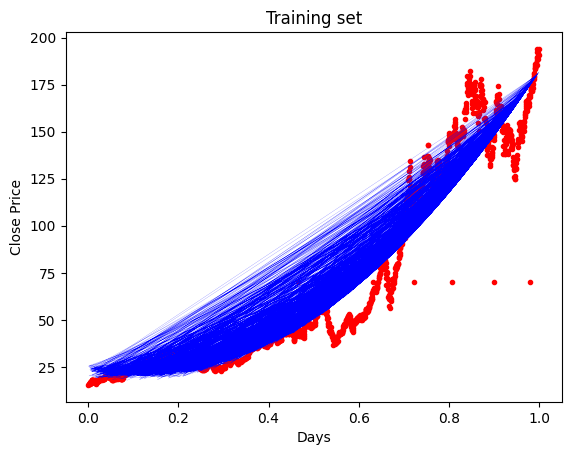

In [ ]:
#For Close Price

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt


# Create support vector regression model and fit the data to it
model1 = SVR(kernel='rbf', C=1e3, gamma=0.1) # Radial basis function kernel
model1.fit(xTrain_scaled1 , yCloseTrain)

# Create testing data points
yClosePrediction3 = model1.predict(xTest_scaled1)

plt.scatter(xTrain_scaled1[:, 0], yCloseTrain, color = 'red', marker = '.')
plt.plot(xTrain_scaled1[:, 0], model.predict(xTrain_scaled1), color = 'blue', linewidth = 0.1)
plt.title('Training set')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.show()


In [ ]:
print(model1.score(xTest_scaled1, yCloseTest)*100, "%")

93.05077504453175 %


In [ ]:
profit_score(yClosePrediction3, yOpenPrediction3)

53.24503311258278 %


### For Scale 2


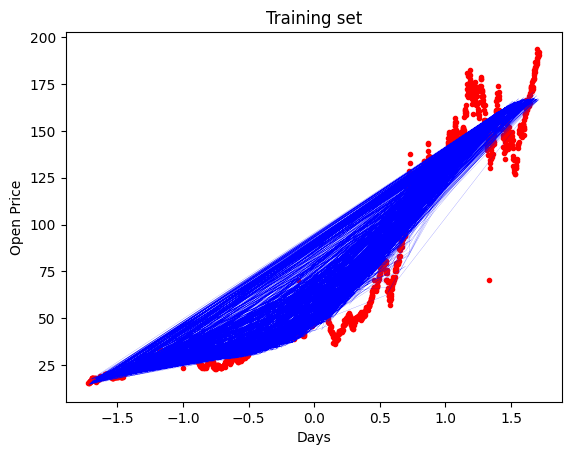

In [ ]:
#For Open Price

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt


# Create support vector regression model and fit the data to it
model = SVR(kernel='rbf', C=1e3, gamma=0.1) # Radial basis function kernel
model.fit(xTrain_scaled2 , yOpenTrain)

# Create testing data points
yOpenPrediction4 = model.predict(xTest_scaled2)

plt.scatter(xTrain_scaled2[:, 0], yOpenTrain, color = 'red', marker = '.')
plt.plot(xTrain_scaled2[:, 0], model.predict(xTrain_scaled2), color = 'blue', linewidth = 0.1)
plt.title('Training set')
plt.xlabel('Days')
plt.ylabel('Open Price')
plt.show()

In [ ]:
print(model.score(xTest_scaled2, yCloseTest)*100, "%")

95.88170473091904 %


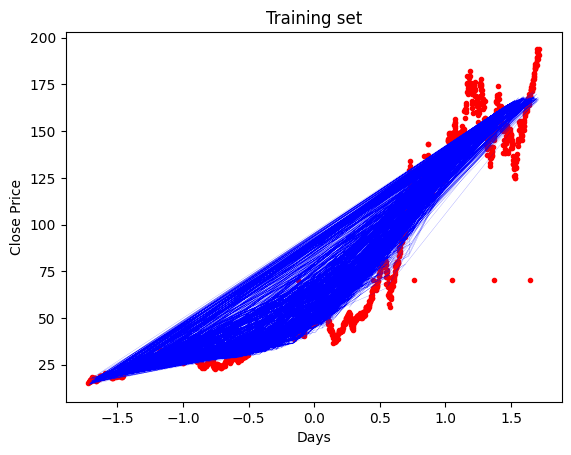

In [ ]:
#For Close Price

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt


# Create support vector regression model and fit the data to it
model1 = SVR(kernel='rbf', C=1e3, gamma=0.1) # Radial basis function kernel
model1.fit(xTrain_scaled2 , yCloseTrain)

# Create testing data points
yClosePrediction4 = model1.predict(xTest_scaled2)

plt.scatter(xTrain_scaled2[:, 0], yCloseTrain, color = 'red', marker = '.')
plt.plot(xTrain_scaled2[:, 0], model1.predict(xTrain_scaled2), color = 'blue', linewidth = 0.1)
plt.title('Training set')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.show()

In [ ]:
print(model1.score(xTest_scaled2, yCloseTest)*100, "%")

95.86266998990173 %


In [ ]:
profit_score(yClosePrediction4, yOpenPrediction4)

53.11258278145695 %


* # **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state = 0)

In [ ]:
# Firstly using scaler1

# For Open price
dt.fit(xTrain_scaled1, yOpenTrain)

yOpenPrediction5 = dt.predict(xTest_scaled1)

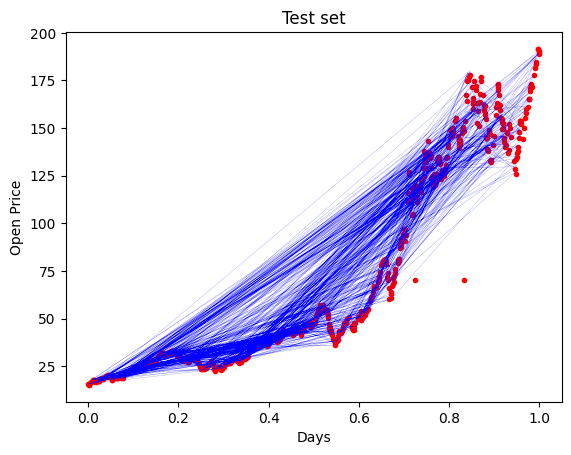

In [ ]:
plt.scatter(xTest_scaled1[:, 0], yOpenTest, color = 'red', marker = '.')
plt.plot(xTest_scaled1[:, 0], dt.predict(xTest_scaled1), color = 'blue', linewidth = 0.1)
plt.title('Test set')
plt.xlabel('Days')
plt.ylabel('Open Price')
plt.show()

In [ ]:
print(dt.score(xTest_scaled1, yOpenTest)*100, "%")

99.3679561456832 %


In [ ]:
# For Close price
dt.fit(xTrain_scaled1, yCloseTrain)

yClosePrediction5 = dt.predict(xTest_scaled1)

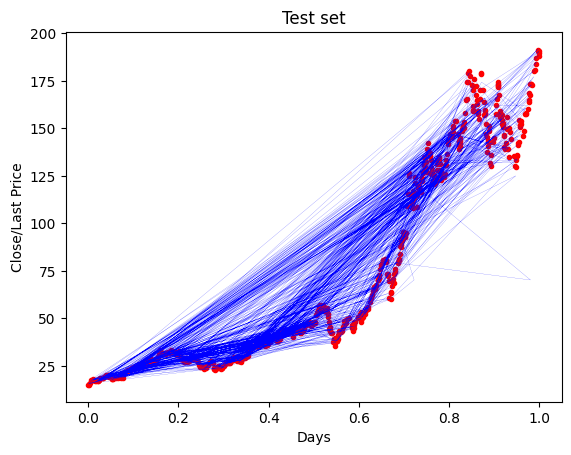

In [ ]:
plt.scatter(xTest_scaled1[:, 0], yCloseTest, color = 'red', marker = '.')
plt.plot(xTest_scaled1[:, 0], dt.predict(xTest_scaled1), color = 'blue', linewidth = 0.1)
plt.title('Test set')
plt.xlabel('Days')
plt.ylabel('Close/Last Price')
plt.show()

In [ ]:
print(dt.score(xTest_scaled1, yCloseTest)*100, "%")

99.17944035600243 %


In [ ]:
profit_score(yClosePrediction5, yOpenPrediction5)

47.81456953642384 %


In [ ]:
# Secondly using scaler2

# For Open price
dt.fit(xTrain_scaled2, yOpenTrain)

yOpenPrediction6 = dt.predict(xTest_scaled2)

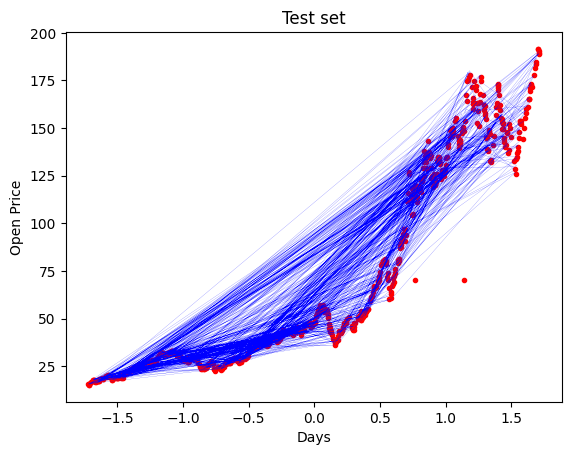

In [ ]:
plt.scatter(xTest_scaled2[:, 0], yOpenTest, color = 'red', marker = '.')
plt.plot(xTest_scaled2[:, 0], dt.predict(xTest_scaled2), color = 'blue', linewidth = 0.1)
plt.title('Test set')
plt.xlabel('Days')
plt.ylabel('Open Price')
plt.show()

In [ ]:
print(dt.score(xTest_scaled2, yOpenTest)*100, "%")

99.36856673601045 %


In [ ]:
# For Close price
dt.fit(xTrain_scaled2, yCloseTrain)

yClosePrediction6 = dt.predict(xTest_scaled2)

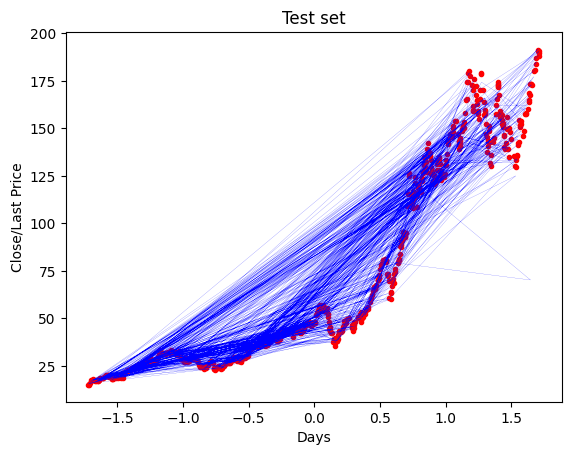

In [ ]:
plt.scatter(xTest_scaled2[:, 0], yCloseTest, color = 'red', marker = '.')
plt.plot(xTest_scaled2[:, 0], dt.predict(xTest_scaled2), color = 'blue', linewidth = 0.1)
plt.title('Test set')
plt.xlabel('Days')
plt.ylabel('Close/Last Price')
plt.show()

In [ ]:
print(dt.score(xTest_scaled2, yCloseTest)*100, "%")

99.2669436676807 %


In [ ]:
profit_score(yClosePrediction6, yOpenPrediction6)

47.81456953642384 %


# *Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)

In [ ]:
# Firstly using scaler1

# For Open price
rf.fit(xTrain_scaled1, yOpenTrain)

yOpenPrediction7 = rf.predict(xTest_scaled1)

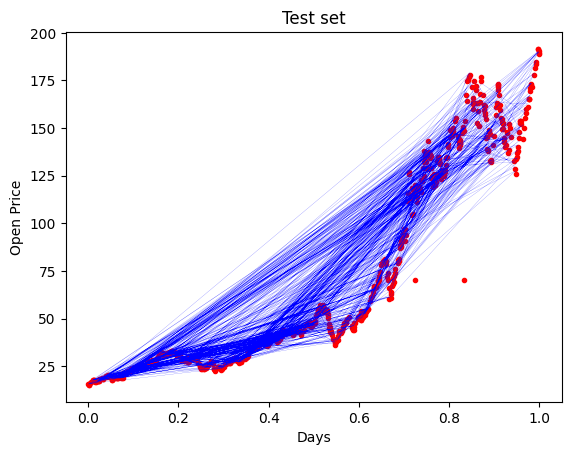

In [ ]:
plt.scatter(xTest_scaled1[:, 0], yOpenTest, color = 'red', marker = '.')
plt.plot(xTest_scaled1[:, 0], rf.predict(xTest_scaled1), color = 'blue', linewidth = 0.1)
plt.title('Test set')
plt.xlabel('Days')
plt.ylabel('Open Price')
plt.show()

In [ ]:
print(rf.score(xTest_scaled1, yOpenTest)*100, "%")

99.43953494748568 %


In [ ]:
# For Close price
rf.fit(xTrain_scaled1, yCloseTrain)

yClosePrediction7 = rf.predict(xTest_scaled1)

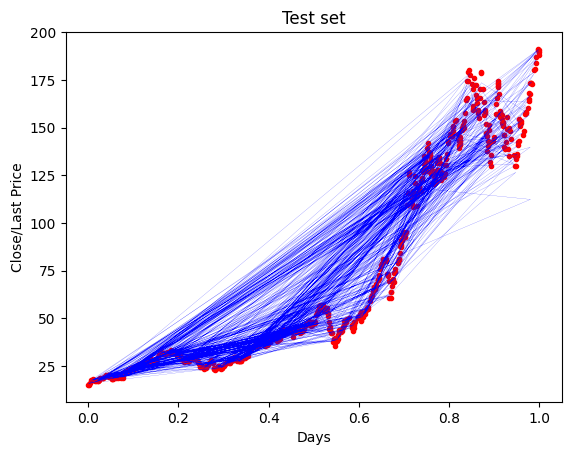

In [ ]:
plt.scatter(xTest_scaled1[:, 0], yCloseTest, color = 'red', marker = '.')
plt.plot(xTest_scaled1[:, 0], rf.predict(xTest_scaled1), color = 'blue', linewidth = 0.1)
plt.title('Test set')
plt.xlabel('Days')
plt.ylabel('Close/Last Price')
plt.show()

In [ ]:
print(rf.score(xTest_scaled1, yCloseTest)*100, "%")

99.54493141274806 %


In [ ]:
profit_score(yClosePrediction7, yOpenPrediction7)

49.66887417218543 %


In [ ]:
# Secondly using scaler2

# For Open price
rf.fit(xTrain_scaled2, yOpenTrain)

yOpenPrediction8 = rf.predict(xTest_scaled2)

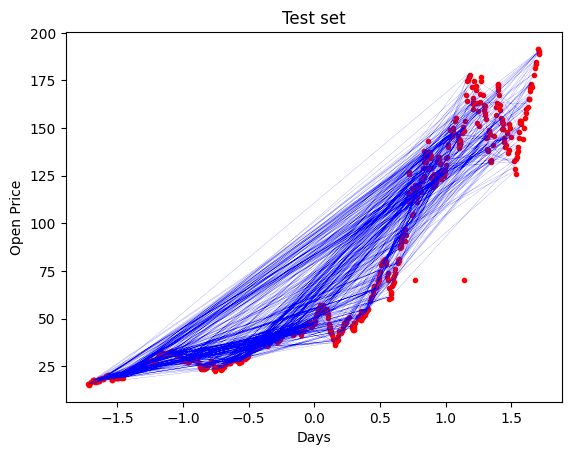

In [ ]:
plt.scatter(xTest_scaled2[:, 0], yOpenTest, color = 'red', marker = '.')
plt.plot(xTest_scaled2[:, 0], rf.predict(xTest_scaled2), color = 'blue', linewidth = 0.1)
plt.title('Test set')
plt.xlabel('Days')
plt.ylabel('Open Price')
plt.show()

In [ ]:
print(rf.score(xTest_scaled2, yOpenTest)*100, "%")

99.43528127759681 %


In [ ]:
# For Close price
rf.fit(xTrain_scaled2, yCloseTrain)

yClosePrediction8 = rf.predict(xTest_scaled2)

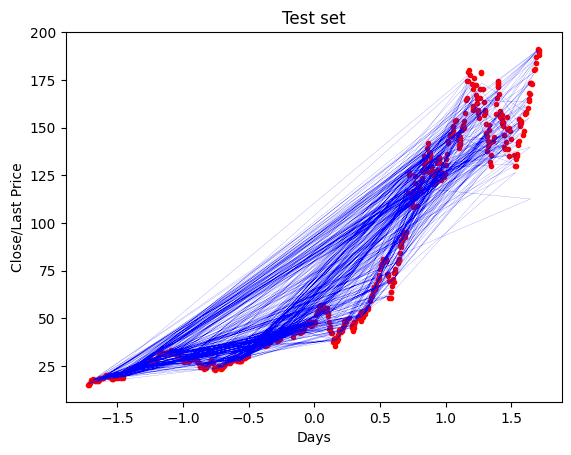

In [ ]:
plt.scatter(xTest_scaled2[:, 0], yCloseTest, color = 'red', marker = '.')
plt.plot(xTest_scaled2[:, 0], rf.predict(xTest_scaled2), color = 'blue', linewidth = 0.1)
plt.title('Test set')
plt.xlabel('Days')
plt.ylabel('Close/Last Price')
plt.show()

In [ ]:
print(rf.score(xTest_scaled2, yCloseTest)*100, "%")

99.56842109781643 %


In [ ]:
profit_score(yClosePrediction8, yOpenPrediction8)

50.06622516556291 %


# * KNN


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors = 8)

In [ ]:
# Firstly using scaler1

# For Open price
knnr.fit(xTrain_scaled1, yOpenTrain)

yOpenPrediction9 = knnr.predict(xTest_scaled1)

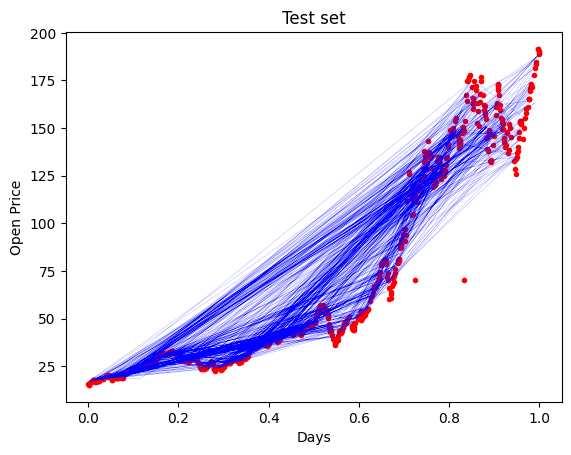

In [ ]:
plt.scatter(xTest_scaled1[:, 0], yOpenTest, color = 'red', marker = '.')
plt.plot(xTest_scaled1[:, 0], knnr.predict(xTest_scaled1), color = 'blue', linewidth = 0.1)
plt.title('Test set')
plt.xlabel('Days')
plt.ylabel('Open Price')
plt.show()

In [ ]:
print(knnr.score(xTest_scaled1, yOpenTest)*100, "%")

98.94189466383918 %


In [ ]:
# For Close price
knnr.fit(xTrain_scaled1, yCloseTrain)

yClosePrediction9 = knnr.predict(xTest_scaled1)

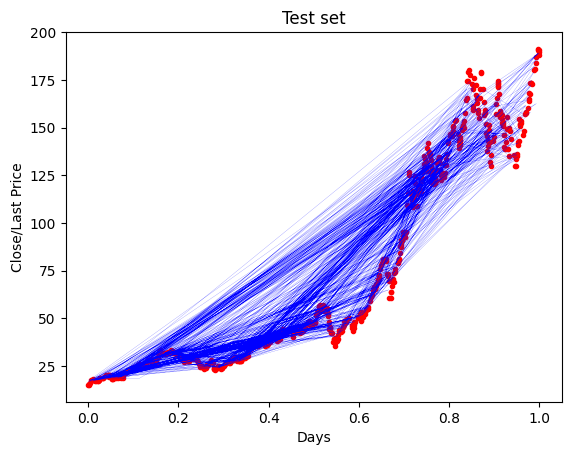

In [ ]:
plt.scatter(xTest_scaled1[:, 0], yCloseTest, color = 'red', marker = '.')
plt.plot(xTest_scaled1[:, 0], knnr.predict(xTest_scaled1), color = 'blue', linewidth = 0.1)
plt.title('Test set')
plt.xlabel('Days')
plt.ylabel('Close/Last Price')
plt.show()

In [ ]:
print(knnr.score(xTest_scaled1, yCloseTest)*100, "%")

99.3741974206228 %


In [ ]:
profit_score(yClosePrediction9, yOpenPrediction9)

45.96026490066225 %


In [ ]:
# Secondly using scaler2

# For Open price
knnr.fit(xTrain_scaled2, yOpenTrain)

yOpenPrediction10 = knnr.predict(xTest_scaled2)

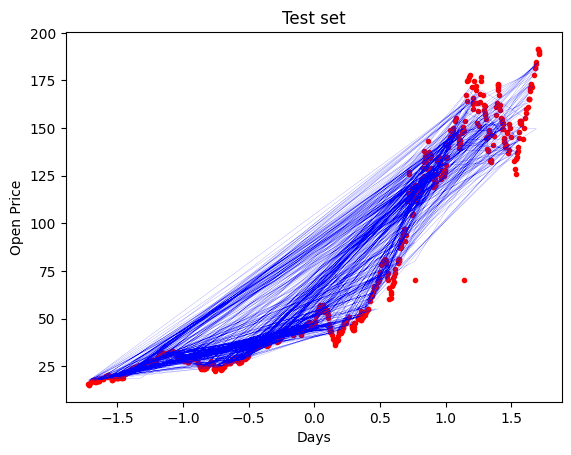

In [ ]:
plt.scatter(xTest_scaled2[:, 0], yOpenTest, color = 'red', marker = '.')
plt.plot(xTest_scaled2[:, 0], knnr.predict(xTest_scaled2), color = 'blue', linewidth = 0.1)
plt.title('Test set')
plt.xlabel('Days')
plt.ylabel('Open Price')
plt.show()

In [ ]:
print(knnr.score(xTest_scaled2, yOpenTest)*100, "%")

98.35337004204642 %


In [ ]:
# For Close price
knnr.fit(xTrain_scaled2, yCloseTrain)

yClosePrediction10 = knnr.predict(xTest_scaled2)

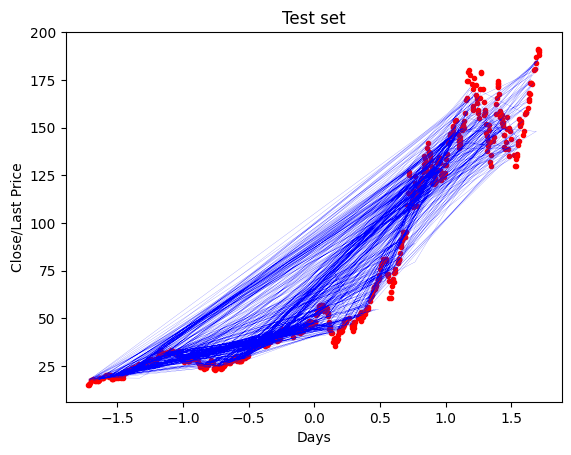

In [ ]:
plt.scatter(xTest_scaled2[:, 0], yCloseTest, color = 'red', marker = '.')
plt.plot(xTest_scaled2[:, 0], knnr.predict(xTest_scaled2), color = 'blue', linewidth = 0.1)
plt.title('Test set')
plt.xlabel('Days')
plt.ylabel('Close/Last Price')
plt.show()

In [ ]:
print(knnr.score(xTest_scaled2, yCloseTest)*100, "%")

98.65057423615711 %


In [ ]:
profit_score(yClosePrediction10, yOpenPrediction10)

49.93377483443709 %


# **Conclusion**<br>

In the linear regression model we got almost 83% accuracy whereas from the SVR model we got more accuracy 93%. When we use Decision Tree, Random Forest, KNN model we got accuracy 99.3%, 99.4% & 98.9% respectively. It seems among our five models Decision Tree and Random forest have better performance.<br>

We calculated the profit using our five different models by just calculating/using  the open price and close price(profit). The results seem like 50.33% for Linear Regression, 53.24% for SVR, 47.81% for Decision Tree, 49.60% for Random Forest, 45.96% for KNN. It seems SVR predicts better profit than other models.